In [1]:
import numpy as np

In [2]:
import pandas as pd 

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
import plotly.offline as py
py.init_notebook_mode(connected=True)

In [6]:
import plotly.graph_objs as go

In [7]:
import plotly.tools as tls

In [8]:
import plotly.figure_factory as ff

In [9]:
import tensorflow as tf

In [10]:
from tensorflow import keras

In [11]:
from tensorflow.keras.models import Sequential

In [12]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dense, Flatten, Dropout, BatchNormalization, LSTM

In [13]:
from tensorflow.keras.regularizers import l1

In [14]:
import lightgbm as lgb

In [15]:
import xgboost as xgb

In [16]:
from sklearn.ensemble import RandomForestClassifier

In [17]:
from sklearn.naive_bayes import GaussianNB

In [18]:
from sklearn.linear_model import RidgeClassifier

In [19]:
from catboost import Pool, CatBoostClassifier, cv

In [20]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [21]:
from sklearn.preprocessing import RobustScaler

In [22]:
from sklearn.metrics import precision_score,make_scorer,roc_auc_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report, confusion_matrix

In [23]:
from sklearn.model_selection import KFold, StratifiedKFold, StratifiedShuffleSplit

In [24]:
import warnings
warnings.filterwarnings("ignore")

In [25]:
import os

In [26]:
from scipy.stats import randint as sp_randint

In [27]:
from scipy.stats import uniform as sp_uniform

In [28]:
from imblearn.over_sampling import ADASYN

In [29]:
df = pd.read_csv("creditcard.csv", nrows=3000)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    3000 non-null   int64  
 1   V1      3000 non-null   float64
 2   V2      3000 non-null   float64
 3   V3      3000 non-null   float64
 4   V4      3000 non-null   float64
 5   V5      3000 non-null   float64
 6   V6      3000 non-null   float64
 7   V7      3000 non-null   float64
 8   V8      3000 non-null   float64
 9   V9      3000 non-null   float64
 10  V10     3000 non-null   float64
 11  V11     3000 non-null   float64
 12  V12     3000 non-null   float64
 13  V13     3000 non-null   float64
 14  V14     3000 non-null   float64
 15  V15     3000 non-null   float64
 16  V16     3000 non-null   float64
 17  V17     3000 non-null   float64
 18  V18     3000 non-null   float64
 19  V19     3000 non-null   float64
 20  V20     3000 non-null   float64
 21  V21     3000 non-null   float64
 22  

In [31]:

df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,...,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1191.911667,-0.341263,0.298964,0.845461,0.106197,-0.086131,0.047216,0.111071,-0.107376,0.031079,...,0.005524,-0.133221,-0.039488,0.015900,0.099407,0.030410,0.042895,0.001446,67.924223,0.000667
std,727.276299,1.402547,1.232003,0.995314,1.320562,1.241658,1.281093,1.174601,1.412400,0.912052,...,0.920741,0.636211,0.360186,0.595608,0.409960,0.479461,0.357704,0.264553,232.893664,0.025816
min,0.000000,-12.168192,-15.732974,-12.389545,-4.657545,-32.092129,-7.465603,-11.164794,-23.632502,-3.244295,...,-11.273890,-4.432106,-4.020300,-2.162523,-1.577384,-1.243924,-5.336289,-2.909294,0.000000,0.000000
25%,559.750000,-1.087461,-0.179784,0.292044,-0.751107,-0.608398,-0.714869,-0.315876,-0.197958,-0.479727,...,-0.225894,-0.546079,-0.187108,-0.356078,-0.150372,-0.303576,-0.043362,-0.017776,3.832500,0.000000
50%,1166.000000,-0.462376,0.357415,0.870887,0.144930,-0.141636,-0.205585,0.123354,0.027345,-0.000420,...,-0.081359,-0.141284,-0.058225,0.091542,0.117506,0.019367,0.028388,0.023043,13.990000,0.000000
75%,1786.250000,1.085485,0.949730,1.461840,1.003314,0.375979,0.434686,0.595160,0.287262,0.532687,...,0.089006,0.286638,0.071355,0.425431,0.370262,0.306371,0.182296,0.093693,56.895000,0.000000
max,2550.000000,1.685314,6.118940,4.017561,6.013346,10.658654,21.393069,34.303177,3.877662,6.450992,...,14.718212,4.393846,4.095021,1.215279,1.629684,3.463246,3.852046,4.157934,7712.430000,1.000000


In [32]:
miss = df.isnull().sum()
miss_percnt = (miss/len(df))*100
pd.concat([miss,miss_percnt], axis=1, keys=['Missing Values','Missing Percentage'])

,Missing Values,Missing Percentage
Time,0,0.0
V1,0,0.0
V2,0,0.0
V3,0,0.0
V4,0,0.0
V5,0,0.0
V6,0,0.0
V7,0,0.0
V8,0,0.0
V9,0,0.0


In [33]:
print('There are 492 frauds and the rest are genuine transactions in the dataset. \n1 represents fraud and 0 represents  Genuine')
df['Class'].value_counts()

There are 492 frauds and the rest are genuine transactions in the dataset. 
1 represents fraud and 0 represents  Genuine


0    2998
1       2
Name: Class, dtype: int64

In [34]:
fraud = df[(df['Class'] != 0)]
normal = df[(df['Class'] == 0)]

In [35]:
trace = go.Pie(labels = ['Normal', 'Fraud'], values = df['Class'].value_counts(), 
               textfont=dict(size=15), opacity = 0.8,
               marker=dict(colors=['lightskyblue','gold'], 
                           line=dict(color='#000000', width=1.5)))


layout = dict(title =  'Distribution of normal and fraud tansactions')
           
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

In [36]:
timedelta = pd.to_timedelta(df['Time'], unit='s')

In [37]:
df['Time_min'] = (timedelta.dt.components.minutes).astype(int)
df['Time_hour'] = (timedelta.dt.components.hours).astype(int)

In [38]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,Time_min,Time_hour
2995,2549,1.215314,0.523792,-0.144504,1.409172,-0.320571,-1.434964,0.160138,-0.144819,0.217257,...,-0.053462,0.545008,0.576136,-0.340671,0.018457,0.050005,1.00,0,42,0
2996,2549,-0.971650,1.011602,1.911303,-0.272867,0.081522,-0.922228,0.715814,-0.135522,-0.423164,...,-0.151661,0.366912,0.126129,0.049316,-0.297565,0.104088,0.00,0,42,0
2997,2550,-1.055610,0.012962,2.178270,1.351661,1.462775,-0.167862,1.044716,-0.969907,0.288101,...,-0.439939,0.131999,0.027163,-0.341652,-0.949933,-0.500359,13.31,0,42,0
2998,2550,-1.055610,0.012962,2.178270,1.351661,1.462775,-0.167862,1.044716,-0.969907,0.288101,...,-0.439939,0.131999,0.027163,-0.341652,-0.949933,-0.500359,13.31,0,42,0
2999,2550,-1.051814,0.018941,2.175615,1.350192,1.449274,-0.158682,1.057312,-0.972456,0.287355,...,-0.438858,0.132192,0.027648,-0.341258,-0.946454,-0.501829,16.34,0,42,0


In [39]:
class_0 = df.loc[df['Class'] == 0]["Time_min"]
class_1 = df.loc[df['Class'] == 1]["Time_min"]

In [40]:
class_0.value_counts()

20    95
17    95
1     93
0     91
15    90
35    90
26    89
40    87
4     87
8     87
10    85
21    83
12    82
23    82
24    82
11    78
5     76
25    76
3     73
22    73
2     71
18    71
9     70
6     69
7     69
41    65
14    65
34    65
19    63
33    62
37    62
27    60
13    57
30    56
16    55
31    54
36    49
38    49
29    46
32    45
28    45
39    33
42    23
Name: Time_min, dtype: int64

In [41]:
hist_data = [class_0, class_1]

In [42]:
group_labels = ['Not Fraud', 'Fraud']

In [43]:
colors = ['#333F44', '#37AA9C', '#94F3E4']

In [44]:
type(hist_data)

list

In [45]:
group_labels

['Not Fraud', 'Fraud']

In [46]:
fig = ff.create_distplot(hist_data, group_labels, show_hist=False, show_rug=False, colors=colors)
fig['layout'].update(title='Credit Card Transactions Time/Hour Density Plot', xaxis=dict(title='Time [Hr]'))
py.iplot(fig, filename='dist_only_Hr')

In [47]:
class_0 = df.loc[df['Class'] == 0]["Time_min"]
class_1 = df.loc[df['Class'] == 1]["Time_min"]

In [48]:
hist_data = [class_0, class_1]

In [49]:
group_labels = ['Not Fraud', 'Fraud']

In [50]:
fig = ff.create_distplot(hist_data, group_labels, show_hist=False, show_rug=False)
fig['layout'].update(title='Credit Card Transactions Time/Hour Density Plot', xaxis=dict(title='Time [Min]'))
py.iplot(fig, filename='dist_only_min')

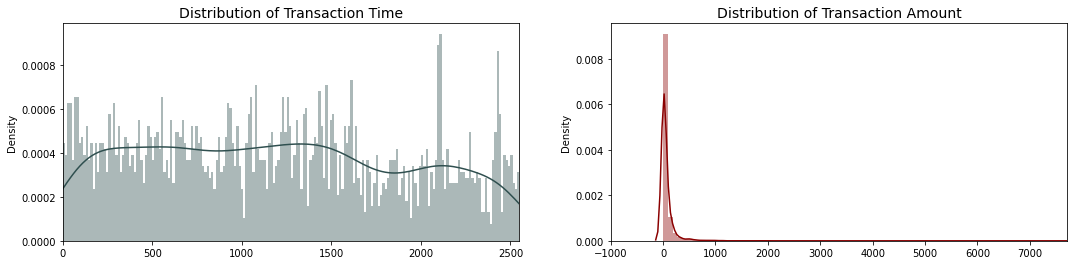

In [51]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(time_val, ax=ax[0], bins=200, color='darkslategray')
ax[0].set_title('Distribution of Transaction Time', fontsize=14)
ax[0].set_xlim([min(time_val), max(time_val)])

sns.distplot(amount_val, ax=ax[1], bins=85, color='darkred')
ax[1].set_title('Distribution of Transaction Amount', fontsize=14)
ax[1].set_xlim([min(amount_val - 1000), max(amount_val)])

plt.show()

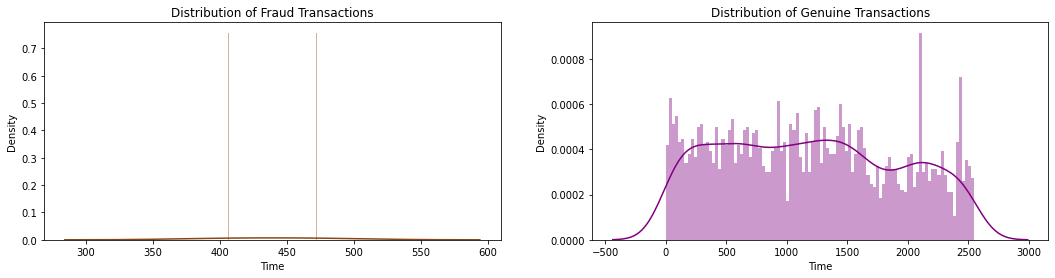

In [52]:
fig, axs = plt.subplots(ncols=2, figsize=(18,4))

sns.distplot(df[(df['Class'] == 1)]['Time'], bins=100, color='saddlebrown', ax=axs[0])
axs[0].set_title("Distribution of Fraud Transactions")

sns.distplot(df[(df['Class'] == 0)]['Time'], bins=100, color='purple', ax=axs[1])
axs[1].set_title("Distribution of Genuine Transactions")

plt.show()

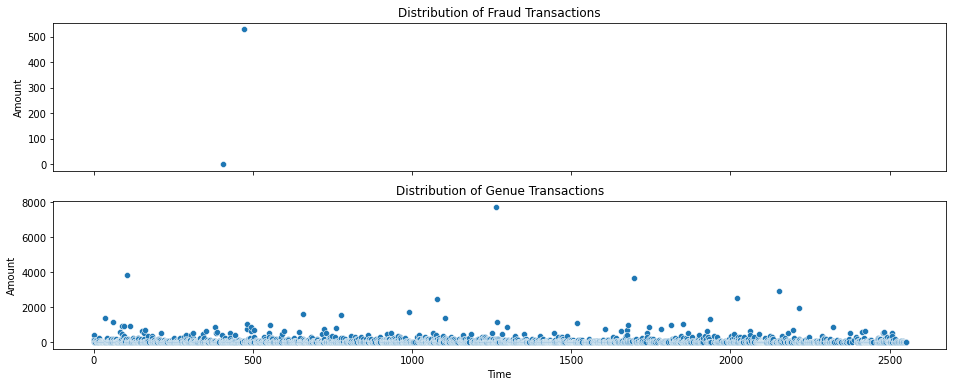

In [53]:
fig, axs = plt.subplots(nrows=2,sharex=True,figsize=(16,6))

sns.scatterplot(x='Time',y='Amount', data=df[df['Class']==1], ax=axs[0])
axs[0].set_title("Distribution of Fraud Transactions")

sns.scatterplot(x='Time',y='Amount', data=df[df['Class']==0], ax=axs[1])
axs[1].set_title("Distribution of Genue Transactions")

plt.show()

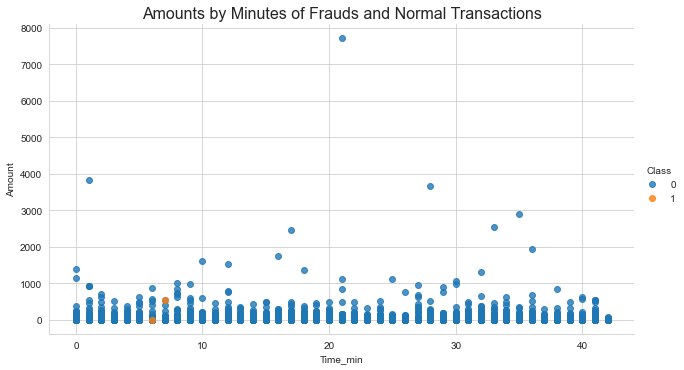

In [54]:
sns.set_style('whitegrid')
ax = sns.lmplot(y="Amount", x="Time_min", fit_reg=False,aspect=1.8,
                data=df, hue='Class')
plt.title("Amounts by Minutes of Frauds and Normal Transactions",fontsize=16)
plt.show()

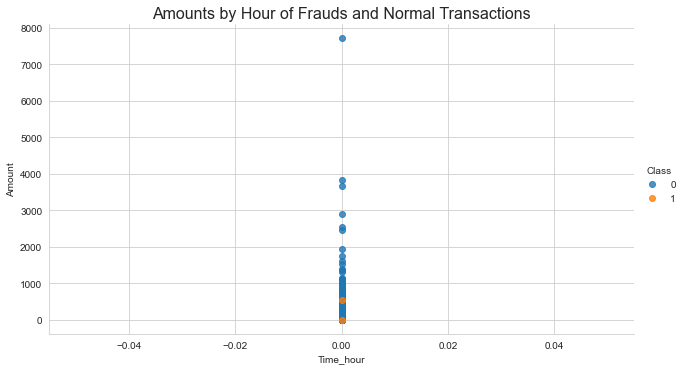

In [55]:
ax = sns.lmplot(y="Amount", x="Time_hour", fit_reg=False,aspect=1.8,
                data=df, hue='Class')
plt.title("Amounts by Hour of Frauds and Normal Transactions", fontsize=16)

plt.show()
df.drop(['Time_hour', 'Time_min'], axis=1, inplace=True)

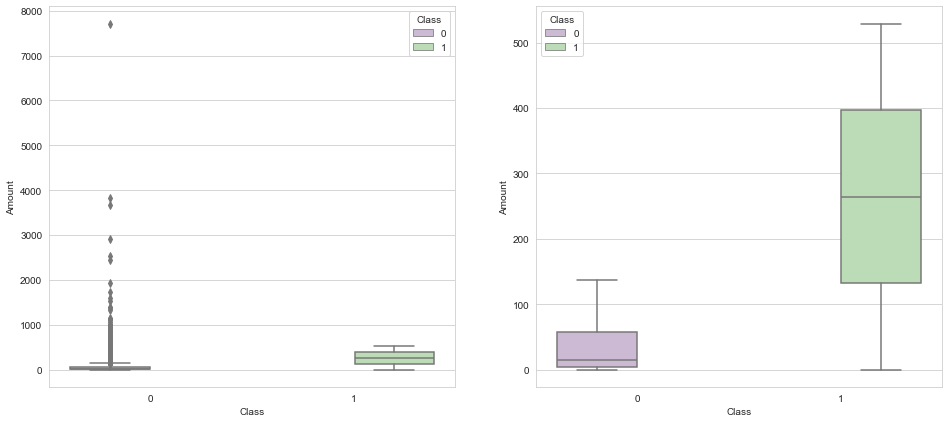

In [56]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16,7))
s = sns.boxplot(ax = ax1, x="Class", y="Amount", hue="Class",data=df, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="Class", y="Amount", hue="Class",data=df, palette="PRGn",showfliers=False)
plt.show();

In [57]:
cols_names = df.drop(['Class', 'Amount', 'Time'], axis=1)
idx = 0

In [58]:
fraud = df[df['Class']==1]
normal = df[df['Class']==0]

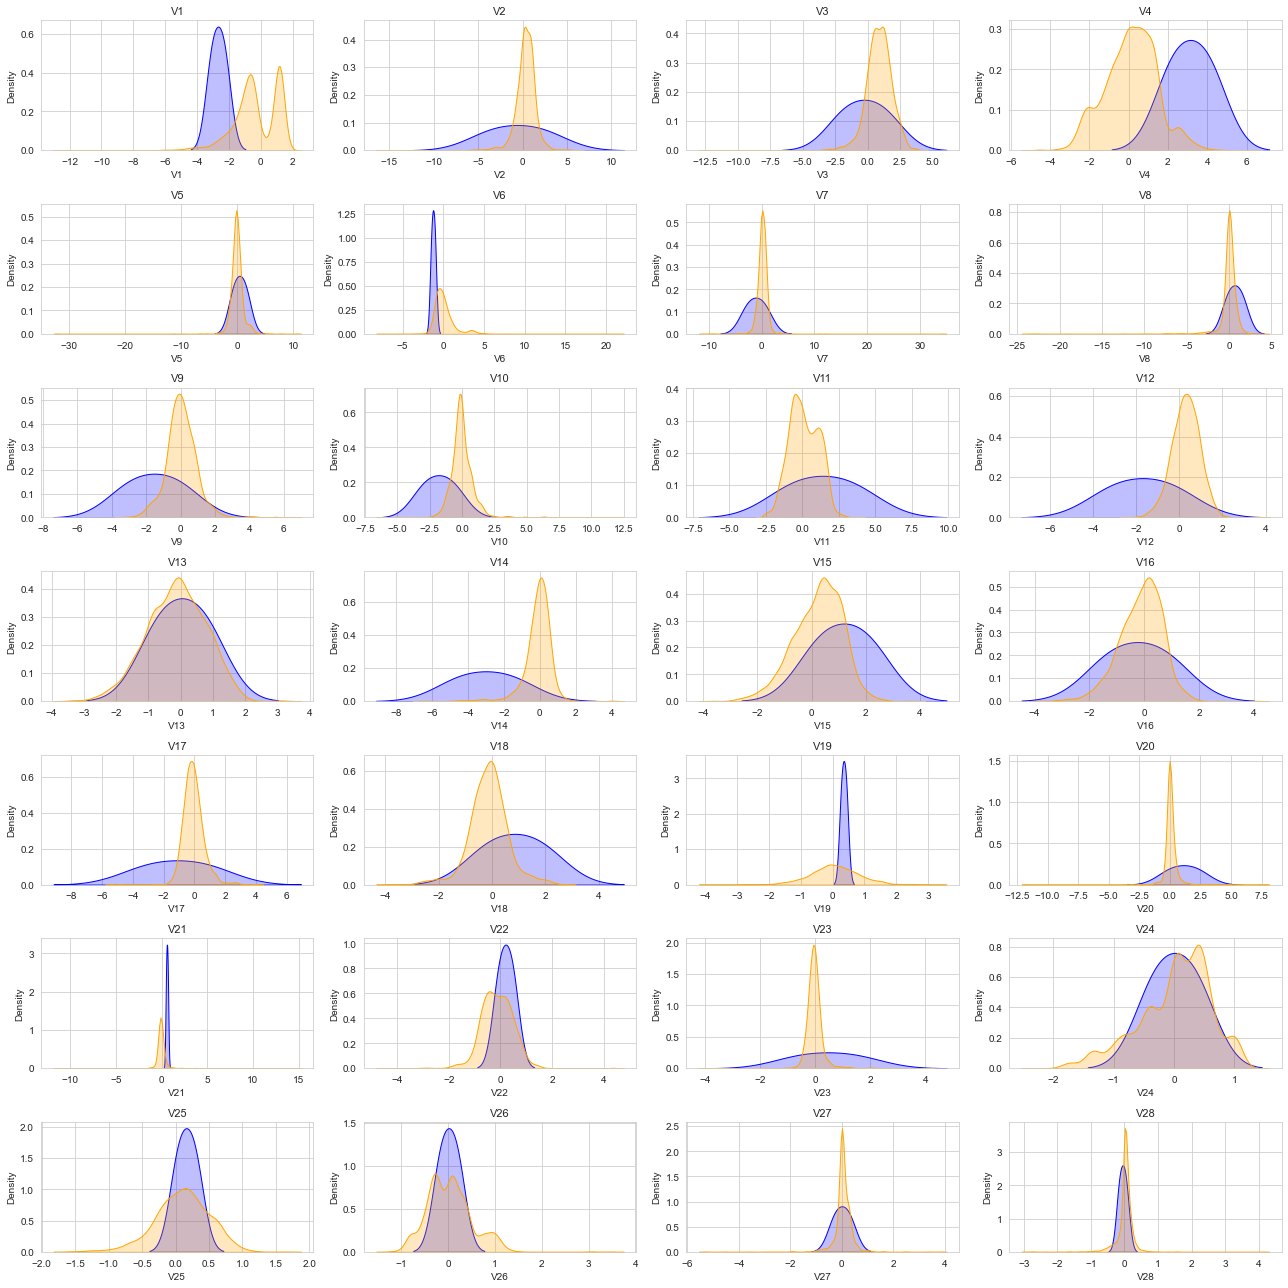

In [59]:
fig, ax = plt.subplots(nrows=7, ncols=4, figsize=(18,18))
fig.subplots_adjust(hspace=1, wspace=1)

for col in cols_names:
    idx += 1
    plt.subplot(7, 4, idx)
    sns.kdeplot(fraud[col], label="Normal", color='blue', shade=True)
    sns.kdeplot(normal[col], label="Fraud", color='orange', shade=True)
    plt.title(col, fontsize=11)
    plt.tight_layout()

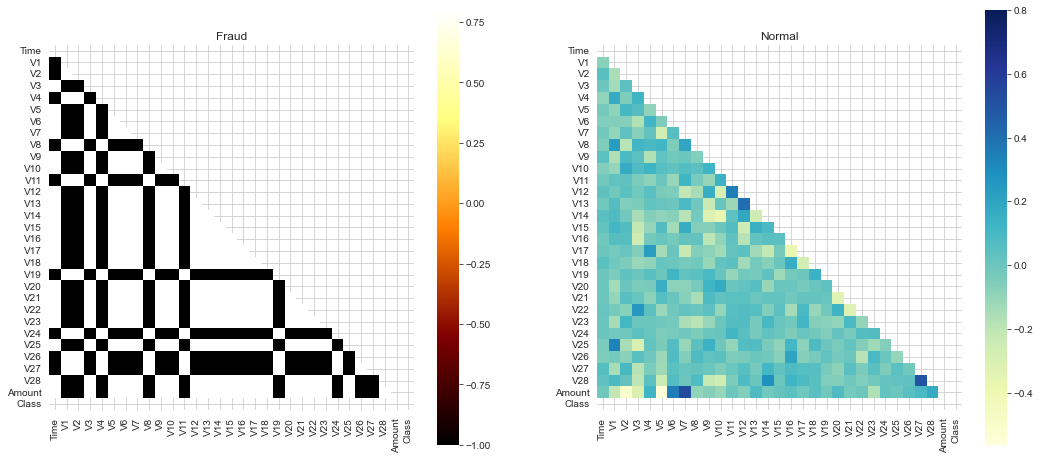

In [60]:
f, (ax1, ax2) = plt.subplots(1,2,figsize =( 18, 8))
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap((df.loc[df['Class'] ==1]).corr(), vmax = .8, square=True, ax = ax1, cmap = 'afmhot', mask=mask);
ax1.set_title('Fraud')
sns.heatmap((df.loc[df['Class'] ==0]).corr(), vmax = .8, square=True, ax = ax2, cmap = 'YlGnBu', mask=mask);
ax2.set_title('Normal')
plt.show()

In [61]:
rob_scaler = RobustScaler()

In [62]:
df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

In [63]:
df.drop(['Time', 'Amount'], axis=1, inplace=True)

In [64]:
X = df.drop('Class', axis=1)
y = df['Class']

In [65]:
target = ['Class']

In [66]:
feat_cols = ['scaled_time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',
       'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'scaled_amount']

In [67]:
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

In [68]:
for train_index, test_index in sss.split(X, y):
    X_train_full, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train_full, y_test = y.iloc[train_index], y.iloc[test_index]

In [69]:
sss2 = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=42)

In [70]:
for train_idx, test_idx in sss2.split(X_train_full, y_train_full):
    X_train, X_valid = X_train_full.iloc[train_idx], X_train_full.iloc[test_idx]
    y_train, y_valid = y_train_full.iloc[train_idx], y_train_full.iloc[test_idx]

In [71]:
print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (1680, 30)
y_train shape:  (1680,)
X_test shape:  (600, 30)
y_test shape:  (600,)


In [72]:
Model = GaussianNB()
Model.fit(X_train[feat_cols], y_train)
y_pred = Model.predict(X_test[feat_cols])

In [73]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       600

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600

[[600]]


In [74]:
print('accuracy is',accuracy_score(y_pred,y_test))

accuracy is 1.0


In [75]:


fit_params = {
             "eval_metric" : 'binary', 
             "eval_set" : [(X_test[feat_cols].values, y_test)],
             'eval_names': ['valid'],
             'categorical_feature': 'auto'}

param_test = {'learning_rate' : [0.001],
              'n_estimators' : [100],
              
             
              'min_child_weight': [1e-5],
              'subsample': sp_uniform(loc=0.2, scale=0.8), 
              'max_depth': [-1],
              'colsample_bytree': sp_uniform(loc=0.4, scale=0.5),
              'reg_alpha': [ 10],
              'reg_lambda': [ 5]}

n_iter = 5 

lgbm_clf = lgb.LGBMClassifier(random_state=42, silent=True, metric='None', n_jobs=0)
grid_search = RandomizedSearchCV(
    estimator=lgbm_clf, param_distributions=param_test, 
    n_iter=n_iter,
    scoring='accuracy',
    cv=4, n_jobs=-1,
    refit=True,
    random_state=42)

grid_search.fit(X_train[feat_cols].values, y_train, **fit_params)
print('Best score reached: {} with params: {} '.format(grid_search.best_score_, grid_search.best_params_))

opt_parameters =  grid_search.best_params_

clf_sw = lgb.LGBMClassifier(**lgbm_clf.get_params())
#Optimal parameter
clf_sw.set_params(**opt_parameters)

[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Info] Number of positive: 1, number of negative: 1679
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000693 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 1680, number of used features: 30
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000595 -> initscore=-7.425954
[LightGBM] [Info] Start training from score -7.425954
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [W

LGBMClassifier(colsample_bytree=0.5872700594236813, learning_rate=0.001,
               metric='None', min_child_weight=1e-05, n_jobs=0, random_state=42,
               reg_alpha=10, reg_lambda=5, silent=True,
               subsample=0.960571445127933)

In [76]:
lgbm_clf = lgb.LGBMClassifier(colsample_bytree=0.6247240713084175, max_depth=6, metric='None',
               min_child_samples=206, min_child_weight=1, n_estimators=1000,
               n_jobs=4, num_leaves=44, random_state=42, reg_alpha=0.1,
               reg_lambda=1, subsample=0.27997993265440235)

lgbm_clf.fit(X_train, y_train)
lgbm_clf.fit(X_train, y_train)
y_pred = lgbm_clf.predict(X_test)
y_score = lgbm_clf.predict_proba(X_test)[:,1]
print(classification_report(y_test,y_pred.round()))

[LightGBM] [Info] Number of positive: 1, number of negative: 1679
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000402 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 1680, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000595 -> initscore=-7.425954
[LightGBM] [Info] Start training from score -7.425954
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that mee

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

In [77]:

clf = RandomForestClassifier(max_depth=5, min_samples_split=5,min_samples_leaf=4, random_state=42)
                            
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score

print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       600

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600

[[600]]
accuracy is 1.0


In [78]:
Model=CatBoostClassifier(eval_metric='Accuracy',use_best_model=True,random_seed=42,task_type='GPU')
Model.fit(X_train[feat_cols],y_train,eval_set=(X_test[feat_cols],y_test))

CatBoostError: C:/Go_Agent/pipelines/BuildMaster/catboost.git/catboost/cuda/cuda_lib/cuda_base.h:281: CUDA error 35: CUDA driver version is insufficient for CUDA runtime version

In [ ]:
y_pred=Model.predict(X_test[feat_cols])
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_pred,y_test))
print('accuracy is ',accuracy_score(y_pred,y_test))

In [ ]:
tmp = pd.DataFrame({'Feature': feat_cols, 'Feature importance': Model.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (10,6))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

In [ ]:
params = {
        'learning_rate': [0.001],
        'max_depth': [3],
        'min_child_weight': [1],
        'subsample': [0.5],
        'colsample_bytree': [0.5],
        'n_estimators' : [100],
        'objective': ['binary:logistic'],
    }

In [ ]:
clf = xgb.XGBClassifier(random_state=42, tree_method='gpu_hist')

In [ ]:
model = GridSearchCV(estimator=clf, param_grid=params, cv=3, n_jobs=-1)

In [ ]:
model.fit(X_train[feat_cols].values, y_train)

In [ ]:
y_pred=model.predict(X_test[feat_cols].values)

In [ ]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_pred,y_test))
print('accuracy is ',accuracy_score(y_pred,y_test))

In [ ]:
ads = ADASYN( n_neighbors=1, random_state=42)

In [ ]:
X_ads, y_ads = ads.fit_resample(X_train_full[feat_cols].values, y_train_full)

In [ ]:
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

In [ ]:
for train_index, test_index in sss.split(X_ads, y_ads):
    X_train_ads, X_valid_ads = X_ads[train_index], X_ads[test_index]
    y_train_ads, y_valid_ads = y_ads[train_index], y_ads[test_index]

In [ ]:
Model = GaussianNB()

In [ ]:
Model.fit(X_train_ads, y_train_ads)

In [ ]:
y_pred = Model.predict(X_test[feat_cols])

In [ ]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print('accuracy is',accuracy_score(y_pred,y_test))

In [ ]:
params = {
        'learning_rate': [0.001],
        'max_depth': [3],
        'min_child_weight': [1],
        'subsample': [0.5],
        'colsample_bytree': [0.5],
        'n_estimators' : [100],
        'objective': ['binary:logistic']
    }

In [ ]:
clf = xgb.XGBClassifier(random_state=42, tree_method='gpu_hist')

In [ ]:
model = GridSearchCV(estimator=clf, param_grid=params, cv=3, n_jobs=-1)

In [ ]:
model.fit(X_train_ads, y_train_ads)

In [ ]:
y_pred=model.predict(X_test[feat_cols].values)

In [ ]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_pred,y_test))
print('accuracy is ',accuracy_score(y_pred,y_test))

In [ ]:
clf = RandomForestClassifier(max_depth=3, min_samples_split=4,min_samples_leaf=4, random_state=42)

In [ ]:
clf.fit(X_train_ads, y_train_ads)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print('accuracy is',accuracy_score(y_pred,y_test))

In [ ]:
fit_params = {"early_stopping_rounds" : 50,
             "eval_metric" : 'binary', 
             "eval_set" : [(X_valid[feat_cols].values, y_valid)],
             'eval_names': ['valid'],
             'verbose': 0,
             'categorical_feature': 'auto'}

In [ ]:
param_test = {'learning_rate' : [0.001],
              'n_estimators' : [100],
              
              'min_child_weight': [1e-5],
              
              'max_depth': [ 3],
              
              'reg_alpha': [0],
              'reg_lambda': [0]}

In [ ]:
n_iter = 4

In [ ]:
lgbm_clf = lgb.LGBMClassifier(random_state=42, silent=True, metric='None')

In [ ]:
grid_search = RandomizedSearchCV(
    estimator=lgbm_clf, param_distributions=param_test, 
    scoring='accuracy',
    cv=4, n_jobs=-1)

In [ ]:
grid_search.fit(X_train_ads, y_train_ads, **fit_params)

In [ ]:
print('Best score reached: {} with params: {} '.format(grid_search.best_score_, grid_search.best_params_))

In [ ]:
opt_parameters =  grid_search.best_params_

In [ ]:
clf_sw = lgb.LGBMClassifier(**lgbm_clf.get_params())

In [ ]:
clf_sw.set_params(**opt_parameters)

In [ ]:
lgbm_clf = lgb.LGBMClassifier(colsample_bytree=0.5339868613881635, learning_rate=0.05,
               max_depth=7, metric='None', min_child_weight=0.1,
               n_estimators=800, num_leaves=36, random_state=42, reg_alpha=0,
               reg_lambda=1, subsample=0.9901662910177844)

In [ ]:
lgbm_clf.fit(X_train, y_train)

In [ ]:
y_pred = lgbm_clf.predict(X_test)

In [ ]:
y_score = lgbm_clf.predict_proba(X_test)[:,1]

In [ ]:
print(classification_report(y_test,y_pred.round()))

In [ ]:
Model=CatBoostClassifier(eval_metric='Accuracy',use_best_model=True,random_seed=42, task_type='GPU')

In [ ]:
Model.fit(X_train_ads,y_train_ads,eval_set=(X_valid_ads,y_valid_ads))

In [ ]:
y_pred=Model.predict(X_test[feat_cols].values)

In [ ]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_pred,y_test))
print('accuracy is ',accuracy_score(y_pred,y_test))

In [ ]:
X_train_d = np.expand_dims(X_train, -1)
X_test_d = np.expand_dims(X_test, -1)
X_valid_d = np.expand_dims(X_valid, -1)
y_valid_d = np.expand_dims(y_valid, -1)
y_train_d = np.expand_dims(y_train, -1)

In [ ]:
model = Sequential()
model.add(Conv1D(32, 2, activation='selu', kernel_initializer="lecun_normal", input_shape=X_train_d[0].shape))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Conv1D(64, 2, activation='selu', kernel_initializer="lecun_normal"))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(128, 2, activation='selu', kernel_initializer="lecun_normal"))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(512, activation='selu', kernel_initializer="lecun_normal"))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

In [ ]:
optimizer = keras.optimizers.Nadam(lr=0.0001, beta_1=0.9, beta_2=0.999)

In [ ]:
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=["accuracy"])

In [ ]:
m = model.fit(X_train_d, y_train, 
              validation_data=(X_valid_d, y_valid_d),
              batch_size=500, 
              epochs=20,
             )

In [ ]:
score = model.evaluate(X_test_d, y_test)
print(score)

In [ ]:
yhat_probs = model.predict(X_test_d, verbose=0)

In [ ]:
yhat_probs = np.argmax(yhat_probs,axis=1)

In [ ]:
precision = precision_score(y_test, yhat_probs)
print('\nPrecision: %f' % precision)
recall = recall_score(y_test, yhat_probs)
print('\nRecall: %f' % recall)

In [ ]:
f1 = f1_score(y_test, yhat_probs)
print('\nF1 score: %f' % f1)

In [ ]:
print("_______________________________________________")
auc = accuracy_score(y_test, yhat_probs)
print('\nAccuracy: %f' % auc)

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(m.history['loss'], label='Loss')
plt.plot(m.history['val_loss'], label='val_Loss')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(m.history['accuracy'], label='auc_1')
plt.plot(m.history['accuracy'], label='val_auc_1')
plt.legend()

In [ ]:
X_train_d.shape

In [ ]:
def create_lstm_model():
    model = Sequential()
    model.add(LSTM(20, input_shape=(X_train_d[0].shape), kernel_initializer='lecun_uniform', activation='relu', kernel_regularizer=l1(0.1), recurrent_regularizer=l1(0.01), bias_regularizer=None, activity_regularizer=None, dropout=0.2, recurrent_dropout=0.2))#, return_sequences=True))
    model.add(Dense(1, kernel_initializer='lecun_uniform', activation='sigmoid'))
    return model

In [ ]:
model = create_lstm_model()

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=["accuracy"])

In [ ]:
m = model.fit(X_train_d, y_train, 
              validation_data=(X_valid_d, y_valid_d),
              batch_size=64, 
              epochs=30,
             )

In [ ]:
score = model.evaluate(X_test_d, y_test)
print(score)

In [ ]:
yhat_probs = model.predict(X_test_d, verbose=0)

In [ ]:
yhat_probs = np.argmax(yhat_probs,axis=1)

In [ ]:
precision = precision_score(y_test, yhat_probs)
print('\nPrecision: %f' % precision)
recall = recall_score(y_test, yhat_probs)
print('\nRecall: %f' % recall)

In [ ]:
print("_______________________________________________")
auc = accuracy_score(y_test, yhat_probs)
print('\nAccuracy: %f' % auc)

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(m.history['loss'], label='Loss')
plt.plot(m.history['val_loss'], label='val_Loss')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(m.history['accuracy'], label='auc_1')
plt.plot(m.history['accuracy'], label='val_auc_1')
plt.legend()